In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\Hp\AppData\Local\Temp\ipykernel_27516\1123596123.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [88]:
data = pd.read_csv("student_scores.csv")

In [89]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [90]:
data["Hours"]

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [91]:
data["Scores"]

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [92]:
X = data["Hours"]
y = data["Scores"]


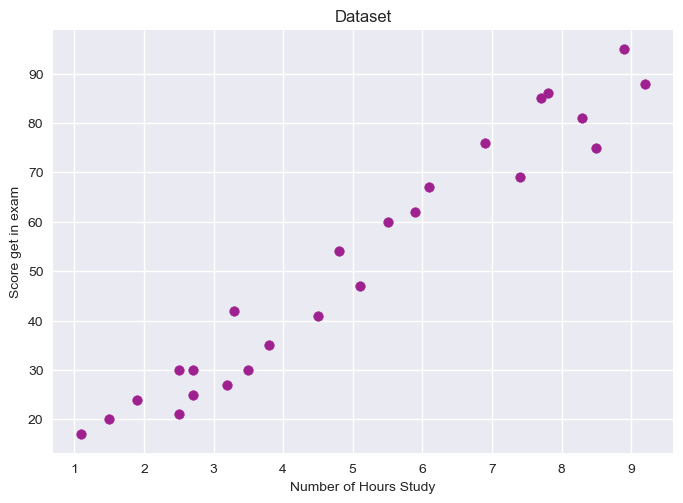

In [93]:
plt.title("Dataset")
plt.xlabel("Number of Hours Study")
plt.ylabel("Score get in exam")
plt.scatter(X , y , color = "#9e218f")
plt.show()



In [94]:
#Spliting the data For testing and training 

def traintestsplit(X , y , split = 0.6):
    m = X.shape[0]
    data1 = np.zeros((m , 2))
    data1[:,0] = X
    data1[: , 1] = y
    np.random.shuffle(data1)
    Split = int(m*split)
    Xtrain = data1[:Split , 0]
    ytrain = data1[:Split , 1]
    Xtest = data1[Split: , 0]
    ytest = data1[Split: , 1]
    
    return Xtrain , ytrain , Xtest , ytest


In [95]:
Xtrain , ytrain , Xtest , ytest = traintestsplit(X , y)

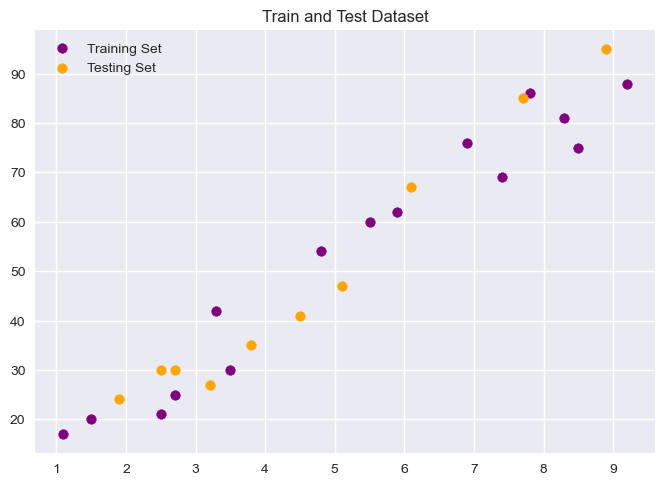

In [96]:
plt.title("Train and Test Dataset")
plt.scatter(Xtrain , ytrain , label = "Training Set" , color = "purple")
plt.scatter(Xtest , ytest , label = "Testing Set" , color = "orange")
plt.legend()
plt.show()

In [97]:
# Defining a hypothesis Function
def hypothesis(X , theta):
    return X*theta[0] + theta[1]

In [98]:
#Defining Cost function this will check how well the model is performing
def costfunction(X , y , theta):
    
    m = X.shape[0]
    error = 0
    for i in range(m):
        error = error + (hypothesis(X[i] , theta) - y[i])**2
        
    return error/(2*m)

In [99]:
# Making a function which will find derivative of cost function
def derivative(X , y , theta):
    m = X.shape[0]
    derive = np.zeros((2,))
    for i in range(m):
        exp = hypothesis(X[i] , theta) - y[i]
        derive[0] = exp*X[i]
        derive[1] = exp
        
    return derive/m
        

In [119]:
# Making a function which will find best values of Parameters

def train(X , y , alpha = 0.5):
    max_itr = 70
    error_list = []
    theta = np.zeros((2,))
    
    for i in range(max_itr):
        derive = derivative(X,y,theta)
        e = costfunction(X , y , theta)
        error_list.append(e)
        theta[0] = theta[0] - alpha*derive[0]
        theta[1] = theta[1] - alpha*derive[1]
    plt.title("Cost Function graph")
    plt.plot(error_list)
    return theta
    

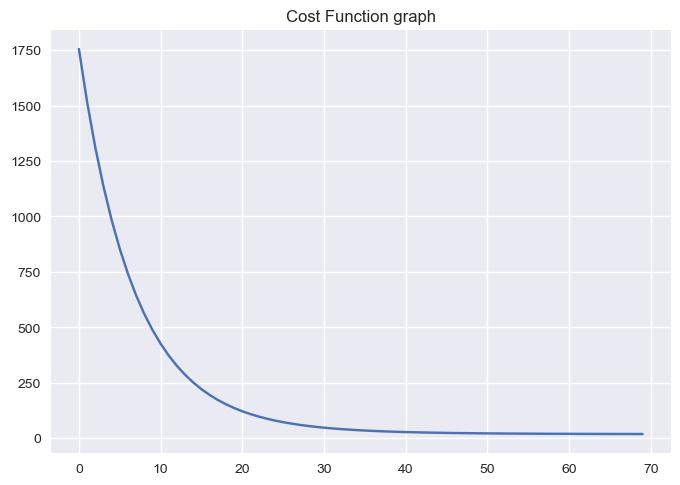

In [120]:
train1 = train(Xtrain,ytrain)

In [121]:
y_predict = hypothesis(Xtest , train1)
print(y_predict)

[28.71007257 45.55331515 23.6570998  72.50250327 39.65818025 50.60628792
 82.60844882 30.39439683 34.60520748 59.02790921]


In [122]:
# Model Evaluation
def evaluation(y , y_predict):
    ymean = np.mean(y)
    
    num = np.sum((y - y_predict)**2)
    denom = np.sum((y - ymean)**2)
    
    return 1 - num/denom

In [123]:
evaluate = evaluation(ytest , y_predict)
print(evaluate)

0.916106226420019


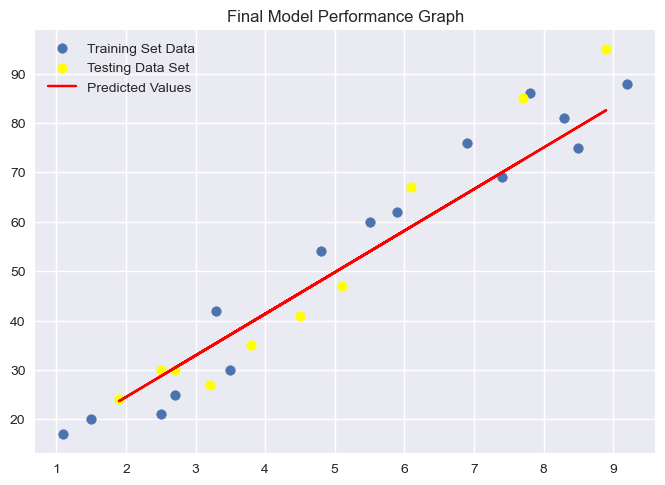

In [124]:
plt.title("Final Model Performance Graph")
plt.scatter(Xtrain , ytrain , label = "Training Set Data")
plt.scatter(Xtest , ytest , label = "Testing Data Set" , color = "yellow")
plt.plot(Xtest , y_predict , label = "Predicted Values" , color = "red")
plt.legend()

plt.show()

In [125]:
pd.DataFrame(ytest , y_predict)

,0
28.710073,30.0
45.553315,41.0
23.657100,24.0
72.502503,85.0
39.658180,35.0
50.606288,47.0
82.608449,95.0
30.394397,30.0
34.605207,27.0
59.027909,67.0
